# Import the required libraries

In [196]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Generating Random Dataset for Model

In [197]:
X = np.vstack([(np.random.rand(10,2)*5),(np.random.rand(10,2)*10)])
Y = np.hstack([[0]*10,[1]*10])
dataset = pd.DataFrame(X,columns=["X1", "X2"])
dataset["Y"] = Y 

# Random Dataset Generated

In [198]:
dataset  # Plotting the dataset

,X1,X2,Y
0,0.575098,2.106660,0
1,2.210323,0.255749,0
2,4.747679,2.208126,0
3,1.061943,0.894417,0
4,4.044542,0.974246,0
5,0.662143,0.691148,0
6,0.850117,1.144650,0
7,0.146370,2.909999,0
8,0.753969,3.529020,0
9,2.287451,3.023050,0


# Plotting the dataset

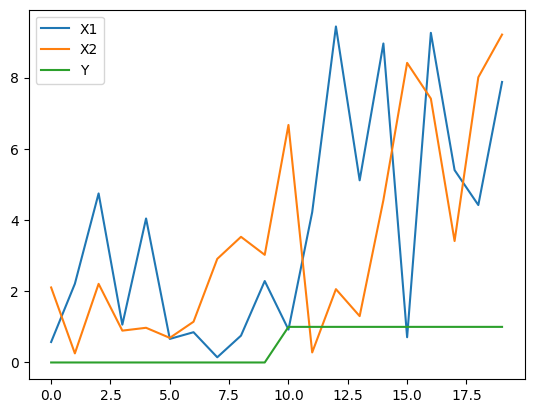

In [199]:
plt.plot(dataset, label="Inline Labels")
plt.legend(["X1", "X2", "Y"])

# Converting target variable to vector of number of classes

In [200]:
Z = np.zeros((20,2))
for i in range(20):
    Z[i, Y[i]] = 1

X.shape, Y.shape, Z.shape

((20, 2), (20,), (20, 2))

# Initiating Random Bias and Weights

In [201]:
Wi_1 = np.random.rand(3, 2)
Bi_1 = np.random.rand(3)
Wi_2 = np.random.rand(3, 2)
Bi_2 = np.random.rand(2)

In [202]:
Wi_1

array([[0.42492946, 0.48070014],
       [0.51520516, 0.40032998],
       [0.32765854, 0.85593798]])

In [203]:
Bi_1

array([0.45525507, 0.72734802, 0.48972597])

In [204]:
Wi_2

array([[0.07125294, 0.86965188],
       [0.13922475, 0.64844219],
       [0.37547416, 0.53322658]])

In [205]:
Bi_2

array([0.21394283, 0.27867111])

In [206]:
X

array([[0.57509847, 2.1066601 ],
       [2.21032278, 0.25574875],
       [4.7476787 , 2.20812557],
       [1.06194253, 0.89441731],
       [4.04454211, 0.97424582],
       [0.66214328, 0.69114815],
       [0.85011729, 1.14464966],
       [0.14637008, 2.90999927],
       [0.75396939, 3.52902007],
       [2.28745087, 3.02304958],
       [0.92359531, 6.67063803],
       [4.22115663, 0.28174839],
       [9.43683718, 2.05941715],
       [5.11633831, 1.30190413],
       [8.95900252, 4.55960526],
       [0.70857638, 8.41475416],
       [9.25842127, 7.41096737],
       [5.40286076, 3.41145205],
       [4.42169978, 8.01037998],
       [7.87864085, 9.20879683]])

In [207]:
X.shape

(20, 2)

In [208]:
X.dot(Wi_1.T)

array([[ 1.25704808,  1.13965289,  1.99160631],
       [ 1.06216972,  1.2411536 ,  0.94313621],
       [ 3.07887481,  3.33000744,  3.44563601],
       [ 0.88119719,  0.90518034,  1.11352028],
       [ 2.18696519,  2.47378878,  2.15912276],
       [ 0.6135992 ,  0.61782696,  0.80853686],
       [ 0.91147313,  0.89622239,  1.25829731],
       [ 1.46103401,  1.24037057,  2.5387383 ],
       [ 2.01678423,  1.80122145,  3.26766681],
       [ 2.42518561,  2.38872387,  3.33704576],
       [ 3.59903947,  3.14629745,  6.01227633],
       [ 1.9291303 ,  2.28755402,  1.62425717],
       [ 4.99995223,  5.68635366,  4.85479365],
       [ 2.79990836,  3.15715517,  2.79076113],
       [ 5.99874697,  6.44107103,  6.838233  ],
       [ 4.34606846,  3.73374056,  7.43467877],
       [ 7.49662898,  7.73681885,  9.37692924],
       [ 3.93572017,  4.14928829,  4.69028485],
       [ 5.72950125,  5.4848778 ,  8.30519614],
       [ 7.77453649,  7.74567388, 10.46366291]])

# Defining the Forward Propagation Function

In [209]:
def forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2):
    M = 1 / (1 + np.exp(-X.dot(Wi_1.T) - Bi_1.reshape(1, -1)))
    A = M.dot(Wi_2) + Bi_2.reshape(1, -1)
    expA = np.exp(A)
    Y = expA / np.sum(expA, axis=1, keepdims=True)
    return Y, M

In [210]:
forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)

(array([[0.20954072, 0.79045928],
        [0.21522448, 0.78477552],
        [0.18305622, 0.81694378],
        [0.22196049, 0.77803951],
        [0.1905124 , 0.8094876 ],
        [0.23380607, 0.76619393],
        [0.22086473, 0.77913527],
        [0.2045732 , 0.7954268 ],
        [0.19360886, 0.80639114],
        [0.18805463, 0.81194537],
        [0.1815503 , 0.8184497 ],
        [0.19435942, 0.80564058],
        [0.17870933, 0.82129067],
        [0.18475358, 0.81524642],
        [0.17823573, 0.82176427],
        [0.17979789, 0.82020211],
        [0.1780375 , 0.8219625 ],
        [0.18011154, 0.81988846],
        [0.17837258, 0.82162742],
        [0.17802659, 0.82197341]]),
 array([[0.84713478, 0.86611088, 0.92282274],
        [0.82015896, 0.87745008, 0.80734688],
        [0.97164342, 0.98299933, 0.98083582],
        [0.79190591, 0.8365157 , 0.8324716 ],
        [0.93352987, 0.96087703, 0.93394   ],
        [0.74437897, 0.79333968, 0.78554247],
        [0.79685103, 0.83528695, 0.8517033

# Backpropogation by Differentiation or Gradient Descent

In [211]:
def diff_Wi_2(H, Z, Y):
    return H.T.dot(Z - Y)

In [212]:
def diff_Wi_1(X, H, Z, output, Wi_2):
    dZ = (Z - output).dot(Wi_2.T) * H * (1 - H)
    # X.T.dot(dZ) gives shape (2, 3); transpose to get (3, 2)
    return (X.T.dot(dZ)).T

def diff_Bi_1(Z, output, Wi_2, H):
    return np.sum((Z - output).dot(Wi_2.T) * H * (1 - H), axis=0)

In [213]:
def diff_Bi_2(Z, Y):
    return np.sum(Z - Y, axis=0)

In [214]:
learning_rate = 1e-3
for epoch in range(5000):
    output, hidden = forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)
    Wi_2 += learning_rate * diff_Wi_2(hidden, Z, output)
    Bi_2 += learning_rate * diff_Bi_2(Z, output)
    Wi_1 += learning_rate * diff_Wi_1(X, hidden, Z, output, Wi_2)
    Bi_1 += learning_rate * diff_Bi_1(Z, output, Wi_2, hidden)

# Generating Predication at new datapoint

In [215]:
X_test = np.array([9,9])

hidden_output = 1 / (1 + np.exp(-X_test.dot(Wi_1.T) - Bi_1.reshape(1, -1)))
final_output = hidden_output.dot(Wi_2) + Bi_2.reshape(1, -1)
exp_final_output = np.exp(final_output)/np.sum(np.exp(final_output))
print("Probability of Class 0 = {} \n Probability of Class 1 = {}".format(exp_final_output[0][0], exp_final_output[0][1]))

Probability of Class 0 = 0.03739490444243719 
 Probability of Class 1 = 0.9626050955575628
